In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [50]:
rcParams['figure.figsize'] = 8,4
sns.set_style('whitegrid')

## Basic Math and Statistics

### arithmetic operations

In [51]:
#limit the number of decimal places
np.set_printoptions(precision=2)

### Create arrays

In [52]:
#creating arrays using a list

a= np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [53]:
b= np.array([[1,2,3,4],[34,43,22,5]])
b

array([[ 1,  2,  3,  4],
       [34, 43, 22,  5]])

In [54]:
#create arrays via assignment
np.random.seed(25)
c= 36*np.random.randn(6)
c


array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [55]:
d=np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [56]:
# performing arithmetic on arrays
a*10

array([10, 20, 30, 40, 50, 60])

In [57]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [58]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [59]:
aa =np.array([[2,3,4,5],[22,44,55,66],[12,14,151,56]])
bb= np.array([[95,35,13,67],[48,24,74,46],[342,4664,46,47]])

In [60]:
aa*bb

array([[  190,   105,    52,   335],
       [ 1056,  1056,  4070,  3036],
       [ 4104, 65296,  6946,  2632]])

In [61]:
aa/bb

array([[2.11e-02, 8.57e-02, 3.08e-01, 7.46e-02],
       [4.58e-01, 1.83e+00, 7.43e-01, 1.43e+00],
       [3.51e-02, 3.00e-03, 3.28e+00, 1.19e+00]])

### Descriptive Statistics

In [62]:
url = 'C:/Users/mailm_000/Desktop/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_03/mtcars.csv'

cars= pd.read_csv(url)

cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']


In [63]:
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [64]:
#get a sum per each column
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [65]:
# get a sum per each row
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [66]:
cars.mean().plot(kind='barh')

C:\Users\mailm_000\Anaconda3\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


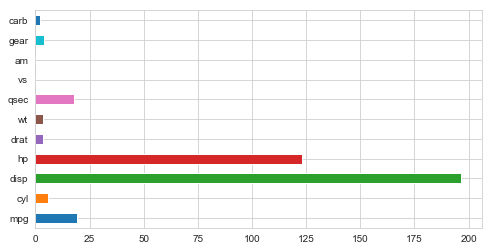

In [67]:
cars.median().plot(kind='barh')

C:\Users\mailm_000\Anaconda3\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


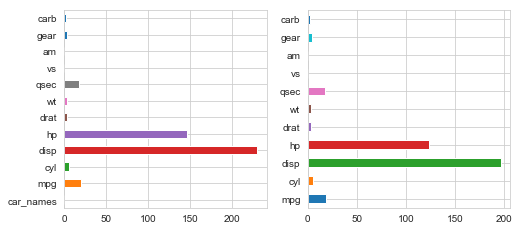

In [68]:
plt.subplots(figsize=(8,8))

plt.subplot(2,2,1)
cars.mean().plot(kind='barh')

plt.subplot(2,2,2)
cars.median().plot(kind='barh')

plt.show()

In [69]:
mpg = cars.mpg

In [70]:
mpg.idxmax()

19

In [71]:
mpg.std()

6.026948052089105

In [72]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [73]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [74]:
gear=cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [75]:
cars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

### Summarize categorical data

In [76]:
cars.head(15)

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0            Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1        Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2           Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3       Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4    Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5              Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6           Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7            Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8             Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9             Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10           Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11          Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12          Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13         Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14  Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4

In [77]:
carb=cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [78]:
cars_cat=cars[['cyl','vs','gear','carb']]
cars_cat.head()

cyl  vs  gear  carb
0    6   0     4     4
1    6   0     4     4
2    4   1     4     1
3    6   1     3     1
4    8   0     3     2

In [79]:
gears_grp=cars_cat.groupby('gear')
gears_grp.describe()

carb                                                cyl           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  15.0  7.466667 ...    
4     12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  12.0  4.666667 ...    
5      5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0   5.0  6.000000 ...    

                  vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 24 columns]

In [80]:
cars.head()

car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

### Transforming variables to categorical type

In [81]:
cars['group']=pd.Series(cars.gear,dtype='category')

In [83]:
cars.group.dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [84]:
cars.group.value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [85]:
cars.columns

Index(['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb', 'group'],
      dtype='object')

In [86]:
pd.crosstab(cars.hp,cars.gear)

gear  3  4  5
hp           
52    0  1  0
62    0  1  0
65    0  1  0
66    0  2  0
91    0  0  1
93    0  1  0
95    0  1  0
97    1  0  0
105   1  0  0
109   0  1  0
110   1  2  0
113   0  0  1
123   0  2  0
150   2  0  0
175   2  0  1
180   3  0  0
205   1  0  0
215   1  0  0
230   1  0  0
245   2  0  0
264   0  0  1
335   0  0  1

### The Pearson Correlation

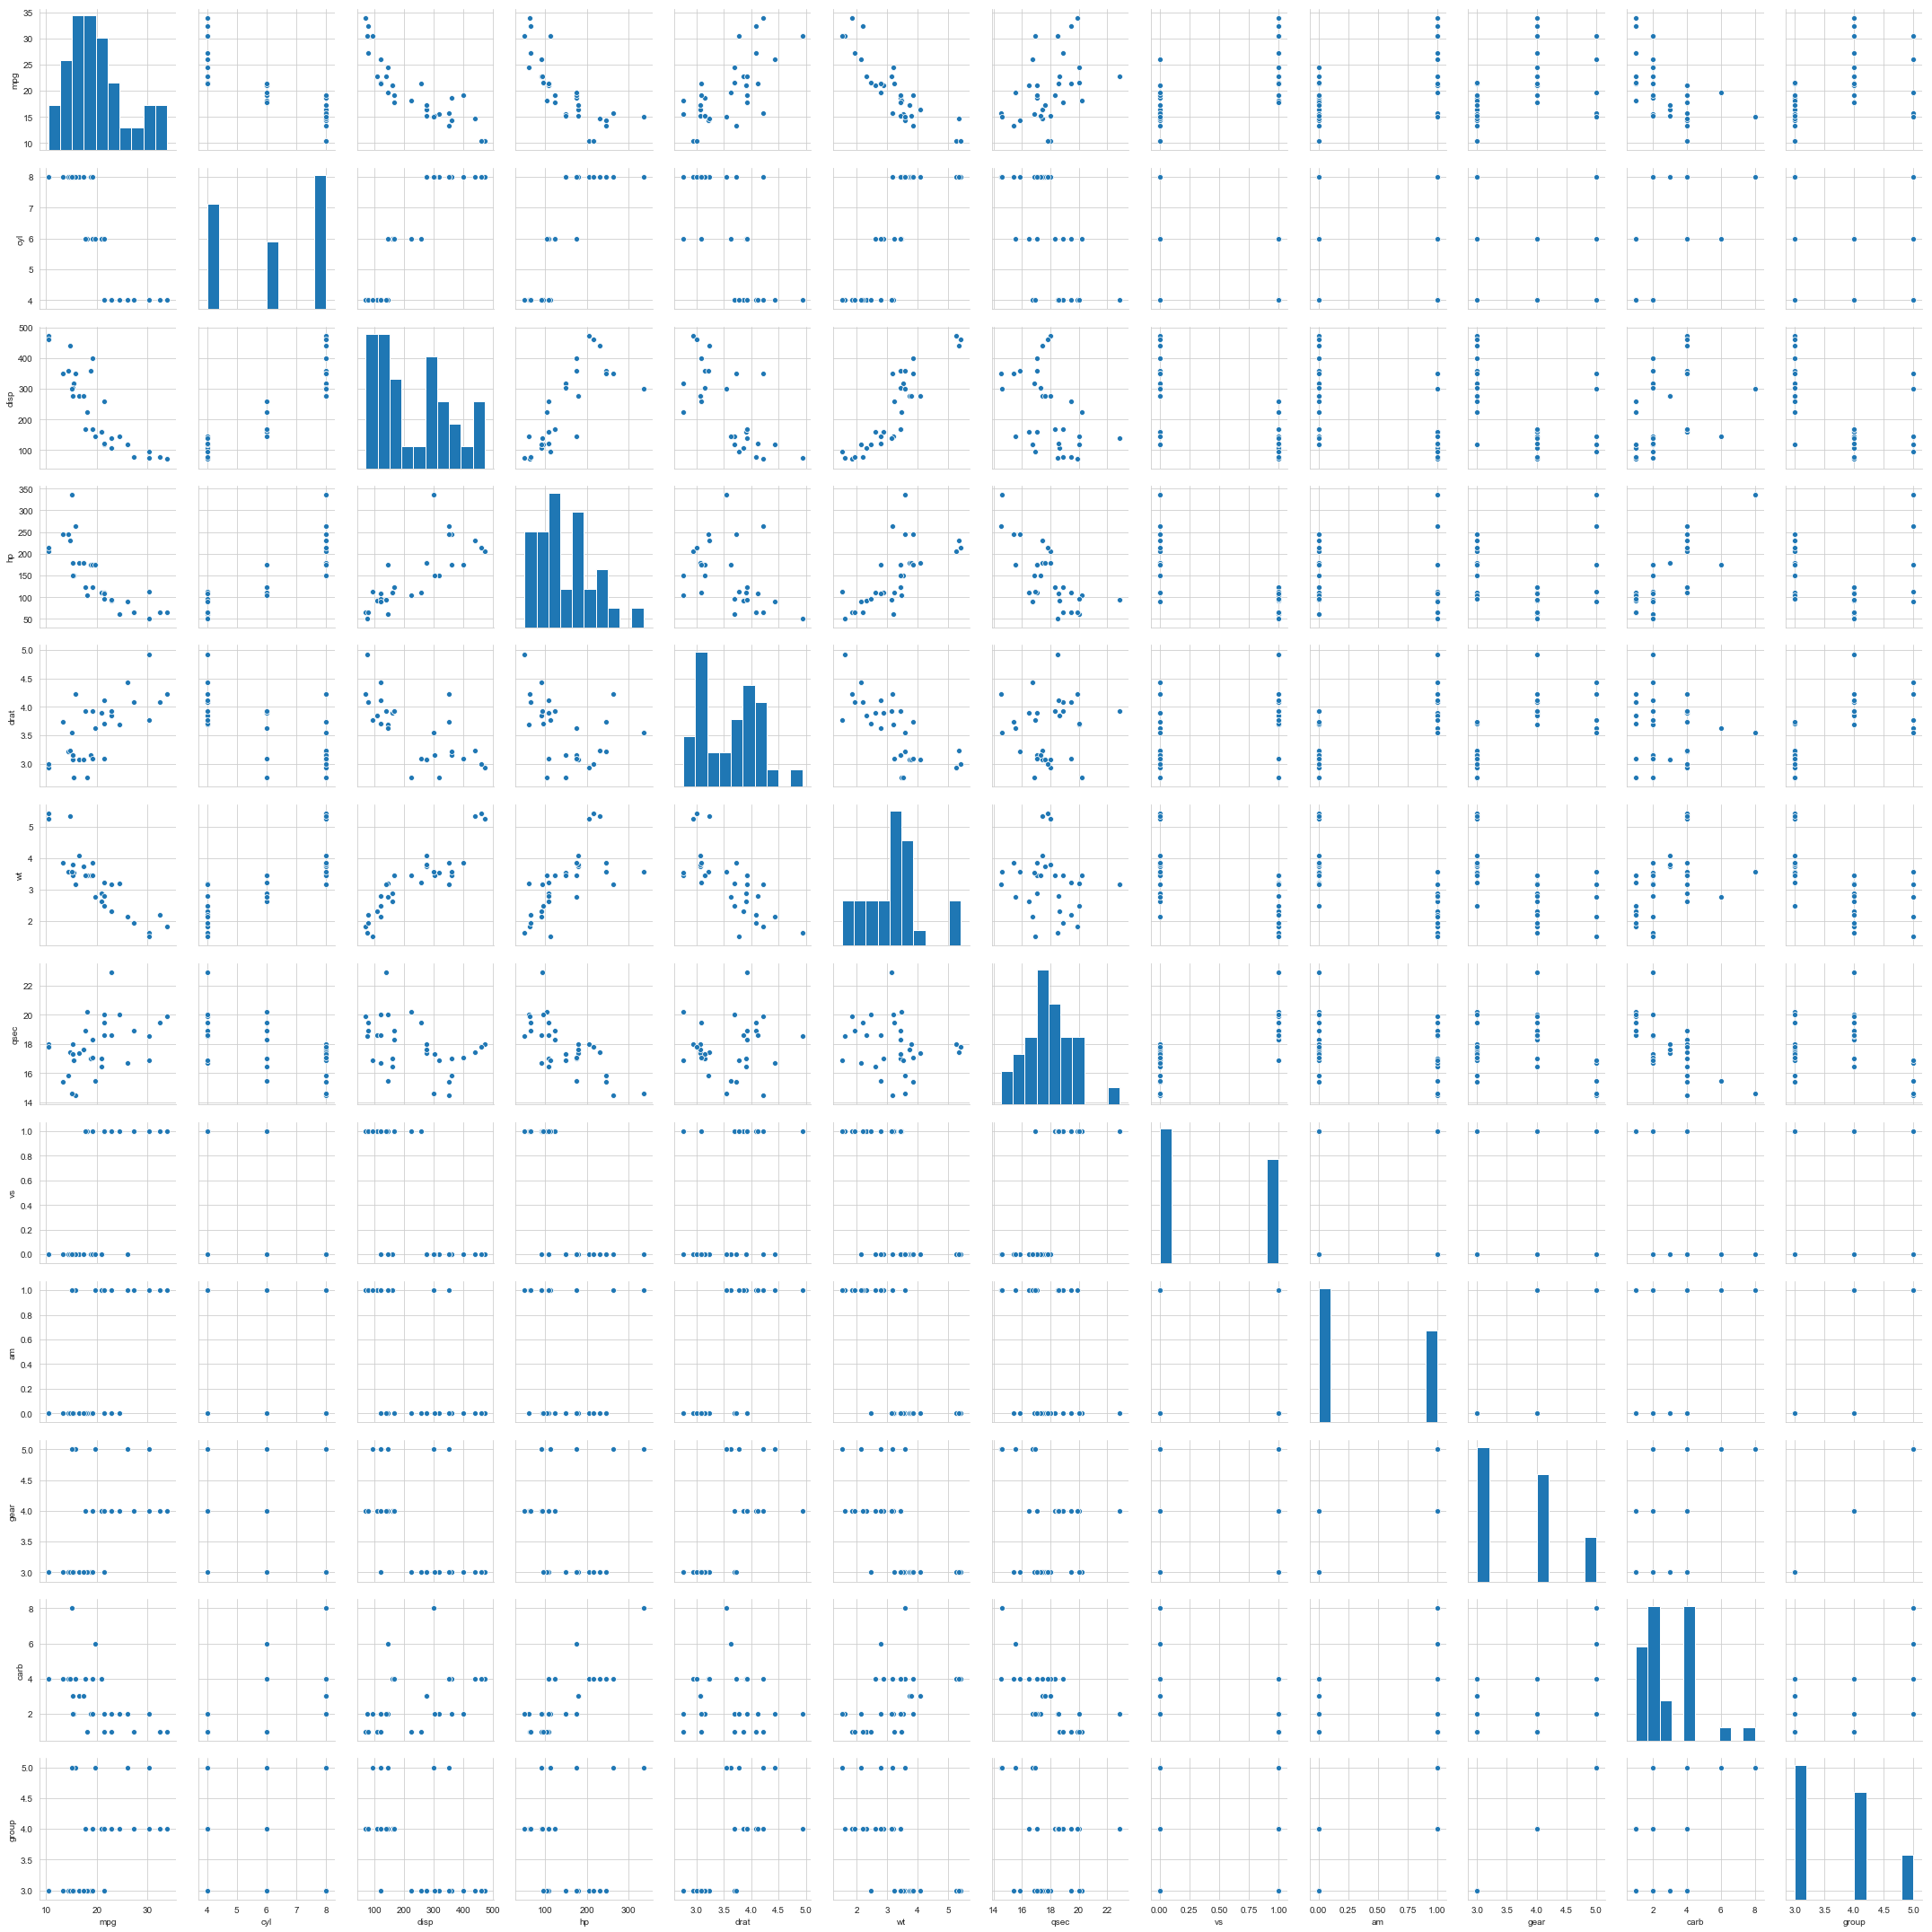

In [87]:
sns.pairplot(cars)

In [88]:
x= cars[['mpg','hp','wt','qsec']]
sns.pairplot(x)

### Using scipy to calculate pearson correlation

In [89]:

mpg=cars.mpg
hp=cars.hp
wt=cars.wt
qsec=cars.qsec

In [90]:
pearsonr_coefficient, p_value= pearsonr(mpg,hp)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient -0.776


In [91]:
pearsonr_coefficient, p_value= pearsonr(mpg,qsec)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient 0.419


In [92]:
pearsonr_coefficient, p_value= pearsonr(mpg,wt)
print ( 'PearsonR Correlation Coefficient %0.3f'  % pearsonr_coefficient)

PearsonR Correlation Coefficient -0.868


### Using pandas to calculate correlation

In [93]:
corr=x.corr() #corr is the correlation function
corr

mpg        hp        wt      qsec
mpg   1.000000 -0.776168 -0.867659  0.418684
hp   -0.776168  1.000000  0.658748 -0.708223
wt   -0.867659  0.658748  1.000000 -0.174716
qsec  0.418684 -0.708223 -0.174716  1.000000

### Using Seaborn to visualize correlations

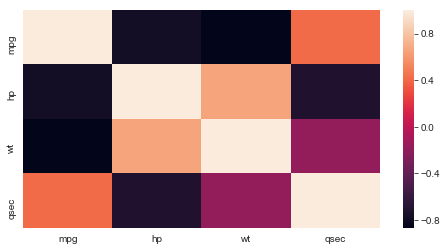

In [94]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

### Spearman rank correlation

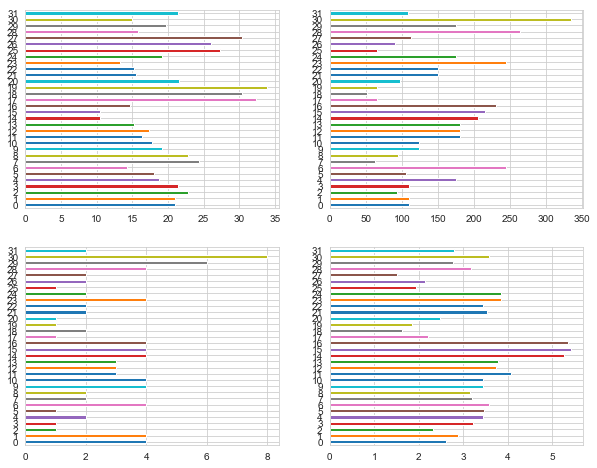

In [95]:
#Just plotting to keep up skills
f, ax = plt.subplots( 2,2, figsize=(10,8))

cars.mpg.plot(kind='barh',ax=ax[0, 0])

cars.hp.plot(kind='barh',ax=ax[0,1])

cars.carb.plot(kind='barh',ax=ax[1,0])

cars.wt.plot(kind='barh',ax=ax[1,1])

In [96]:
y= cars[['cyl','vs','am','gear']]

sns.pairplot(y)

In [97]:

cyl=cars.cyl
vs=cars.vs
am=cars.am
gear=cars.gear

In [98]:
spearmanr_coefficient, p_value= spearmanr(cyl,vs)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.814


In [99]:
spearmanr_coefficient, p_value= spearmanr(cyl,am)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.522


In [100]:
spearmanr_coefficient, p_value= spearmanr(cyl,gear)
print ( 'SpearmanR Correlation Coefficient %0.3f'  % spearmanr_coefficient)

SpearmanR Correlation Coefficient -0.564


### Chi squared test for independence

In [101]:
# to use chi squared test the data needs to be in a cross tab
table = pd.crosstab(cyl,am)

chi2,p,dof,expected= chi2_contingency(table.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 8.741 p_value 0.013


In [102]:
table2 = pd.crosstab(cyl,vs)

chi2,p,dof,expected= chi2_contingency(table2.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 21.340 p_value 0.000


In [103]:
table3 = pd.crosstab(cyl,gear)

chi2,p,dof,expected= chi2_contingency(table3.values)
print ('Chi Squared Statistic %0.3f p_value %0.3f'  % (chi2,p))

Chi Squared Statistic 18.036 p_value 0.001


In [104]:
# since non of the p values are greater than 0.05 we must 
#reject the null hypothesis and conclude that the variables are correlated

# with the Chi squared test we need a p value greater than 0.05
#to reject the null hypothesis that the variables are independent of each other

### Transforming dataset distributions

In [129]:
 cars.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [108]:
cars.mpg.plot()

In [109]:
cars.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [120]:
mpg = cars.mpg
mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [115]:
mpg.dtypes

dtype('float64')

In [127]:
mpg_matrix= cars.mpg.values.reshape(-1,1) # reshape (-1,1) says reshapes the 
#data into unknow number of rows(-1) and one column (1)

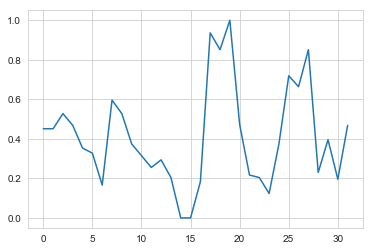

In [128]:
#funtion preprocessing.MinMaxScaler takes your data and scales it between 0 and 1
mpg_matrix= cars.mpg.values.reshape(-1,1) # reshape (-1,1) says reshapes the data into unknow number of rows(-1) and one column (1)
scaled =preprocessing.MinMaxScaler()
bubble_gum= scaled.fit_transform(mpg_matrix)
plt.plot(bubble_gum)

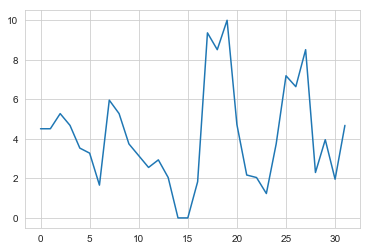

In [130]:
#changing the range from 0-1 to 0-10
mpg_matrix= cars.mpg.values.reshape(-1,1) # reshape (-1,1) says reshapes the data into unknow number of rows(-1) and one column (1)
scaled =preprocessing.MinMaxScaler(feature_range=(0,10))
bubble_gum= scaled.fit_transform(mpg_matrix)
plt.plot(bubble_gum)

### Using Scale() to scale data

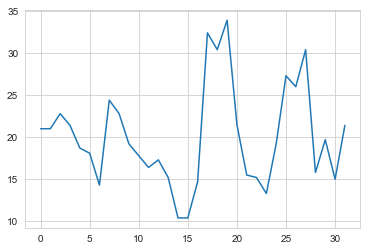

In [135]:
#show what unscaled looks like
standardized_mpg=scale(mpg,axis=0,with_mean=False,with_std=False)
plt.plot(standardized_mpg)

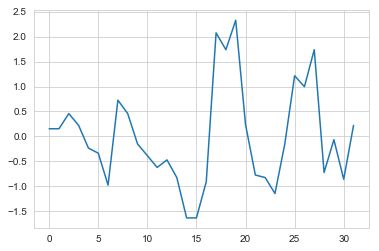

In [137]:
#showing what scaled looks like
stand_mpg=scale(mpg)
plt.plot(stand_mpg)